In [11]:
import SNIDsn
import SNIDdataset as snid
import numpy as np
import SNePCA

import plotly.plotly as ply
import plotly.graph_objs as go
import plotly.tools as tls

import matplotlib.pyplot as plt

from BinSpectra import random_noise_dataset
from BinSpectra import lowres_dataset
import warnings
from cycler import cycler
import random

PATH = '../Data/DataProducts/'

In [12]:
def loaddata(phase):
    dsname = "dataset{}.pickle".format(phase)
    return snid.loadPickle(PATH + dsname)

def replace_flux_with_noise(phase):
    """
    Replaces the flux in the input spectrum with random Gaussian noise.
    Parameters
    ----------
    phase : integer, phase of the dataset.
    
    Returns
    -------
    dataset with flux of each spectra replaced by random Gaussian noise.
    """
    datain = loaddata(phase)
    dataset_randn = random_noise_dataset(datain)
    return dataset_randn

def run_PCA_lowres(phase, b_len, dphase=5):
    """
    Runs PCA with lower resolutions of the spectrum.
    Parameters
    ----------
    phase : integer, phase of the dataset.
    b_len : the desired bining length of the output spectrum.
    
    Returns
    -------
    Principle components
    """
    warnings.filterwarnings('ignore')
    dataset = replace_flux_with_noise(phase)
    dataset_lowres = lowres_dataset(dataset, b_len)
    snidPCA = SNePCA.SNePCA(dataset_lowres, phase - dphase, phase + dphase)
    snidPCA.snidPCA()
    snidPCA.calcPCACoeffs()
    return snidPCA


def run_PCA_fullres(phase, dphase=5):
    """
    Runs PCA with full resolutions of the spectrum.
    Parameters
    ----------
    phase : integer, phase of the dataset.
        
    Returns
    -------
    Principle components
    """
    warnings.filterwarnings('ignore')
    dataset = replace_flux_with_noise(phase)
    snidPCA = SNePCA.SNePCA(dataset, phase - dphase, phase + dphase)
    snidPCA.snidPCA()
    snidPCA.calcPCACoeffs()
    return snidPCA

## SVM scores for full resolution random noise

### Phase 0

0.1811764705882353 0.06638463990431004
0.27058823529411763 0.09188529030478418
0.23764705882352943 0.10117647058823528
0.2 0.0831890330807703
0.26235294117647057 0.09927766799901072
0.27058823529411763 0.09557692240748189
0.15882352941176467 0.07083290928701351
0.16352941176470587 0.07917393580419407
0.18941176470588236 0.08175412542631383
0.1752941176470588 0.07934855872431647


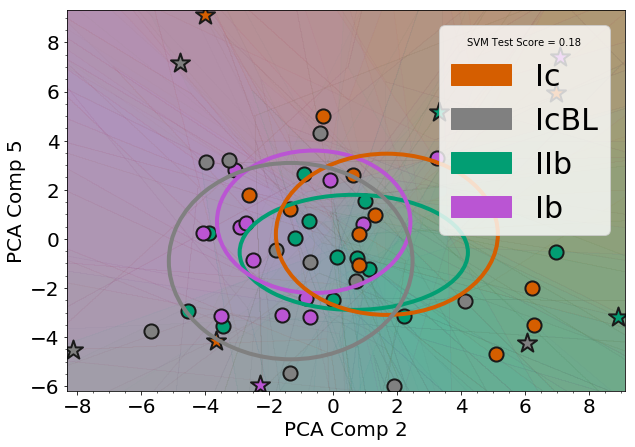

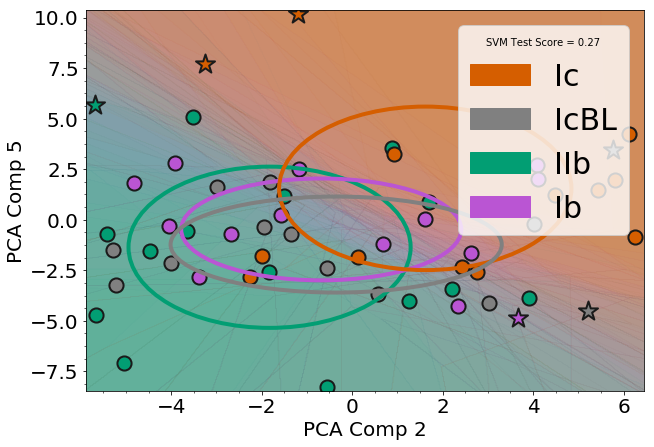

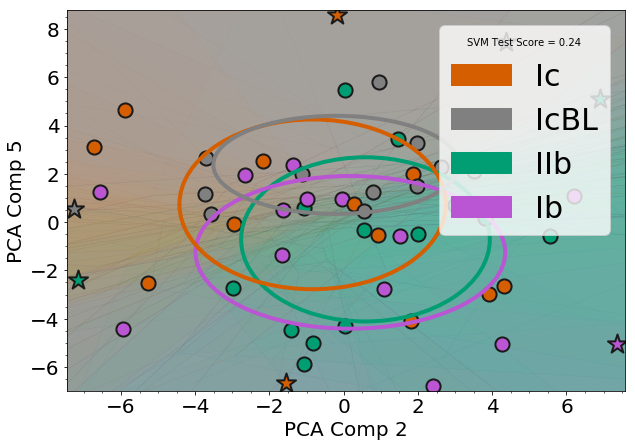

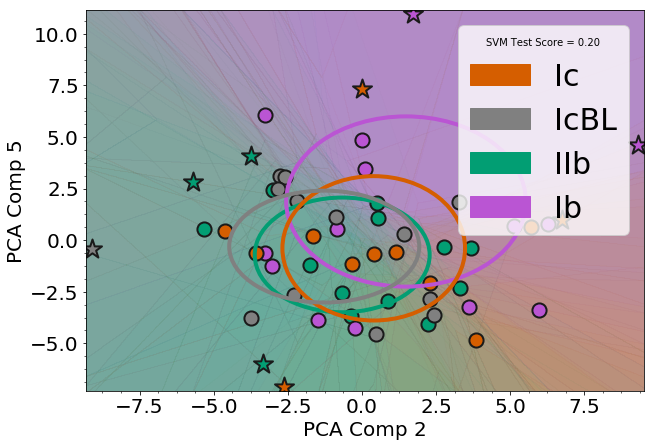

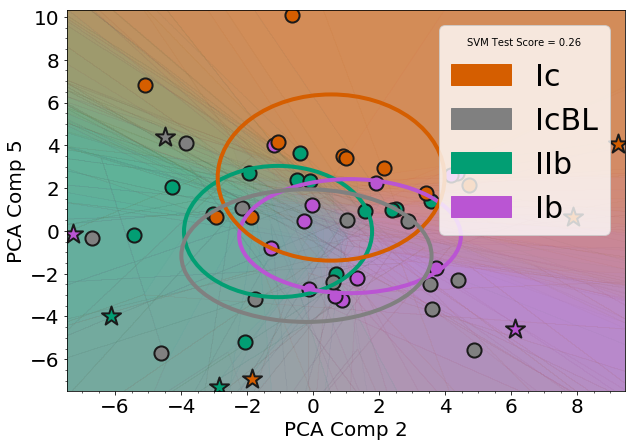

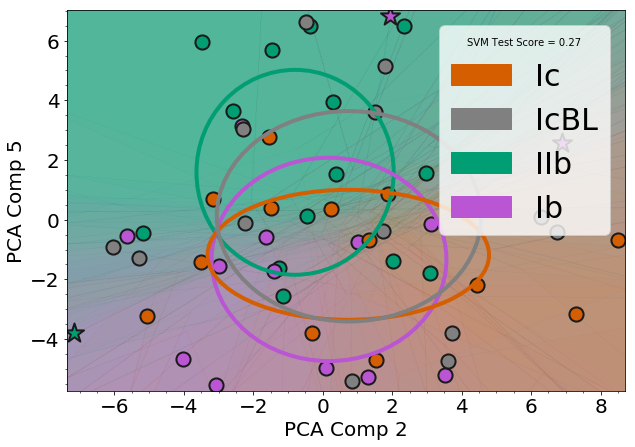

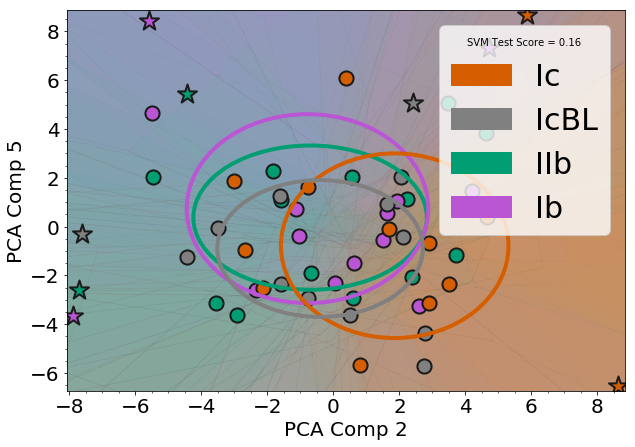

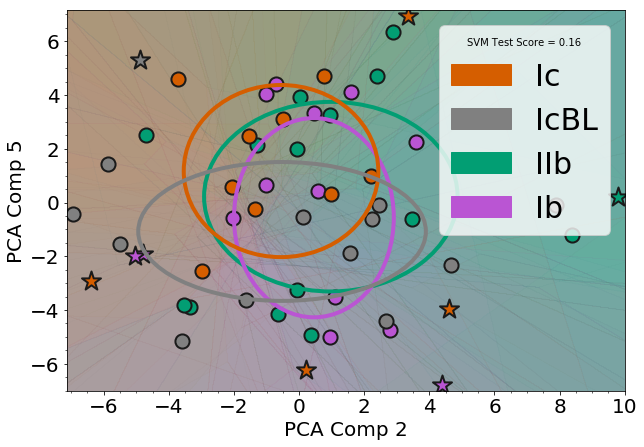

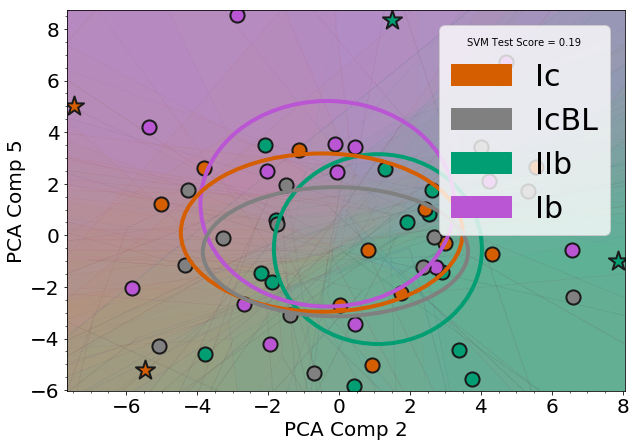

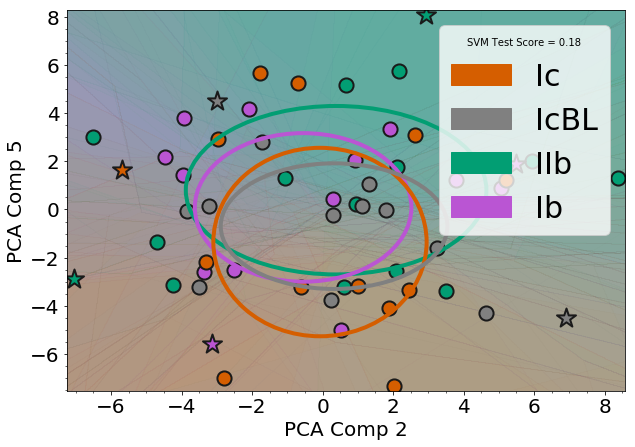

In [7]:
for i in range(10):
    snidPCA = run_PCA_fullres(0, dphase=5)
    exclude = ['sn2007uy', 'sn2009er', 'sn2005ek']
    f_all,svmsc, av0, std0, av0_train,std0_train=snidPCA.pcaPlot(2,5,(10,7),alphamean=.5,alphaell=.1,alphasvm=10,
                                              purity=True,excludeSNe=exclude, std_rad=1.0, svm=True,
                                              count=3, fig=None, ax=None,ncv=50, markOutliers=True)
    print(av0, std0)

### Phase 5

0.215 0.08212033852828422
0.14125 0.07050044326101787
0.2925 0.09956153875869939
0.19 0.08474225628339145
0.16625 0.09731553062075961
0.29875 0.11339229471176601
0.1925 0.06828250141873832
0.23 0.09307255234493142
0.14625 0.07246766520317872
0.22375 0.07612694989292558


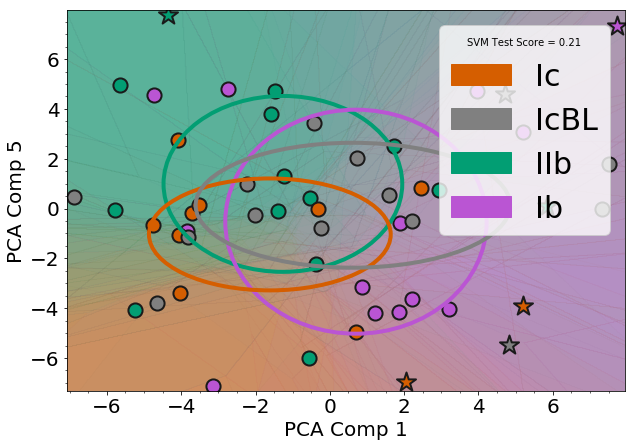

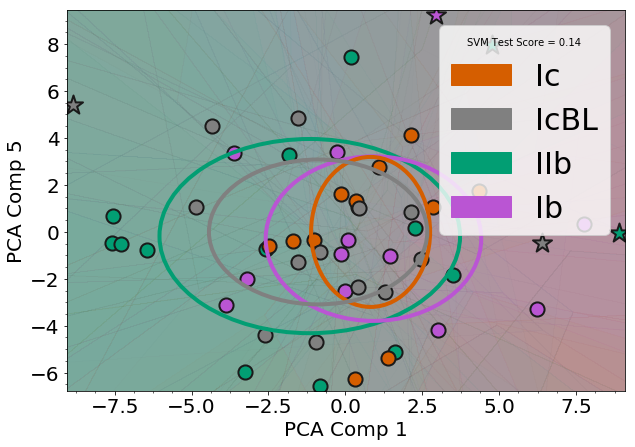

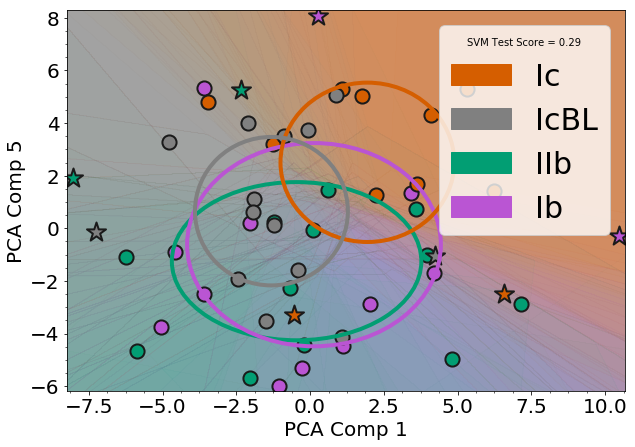

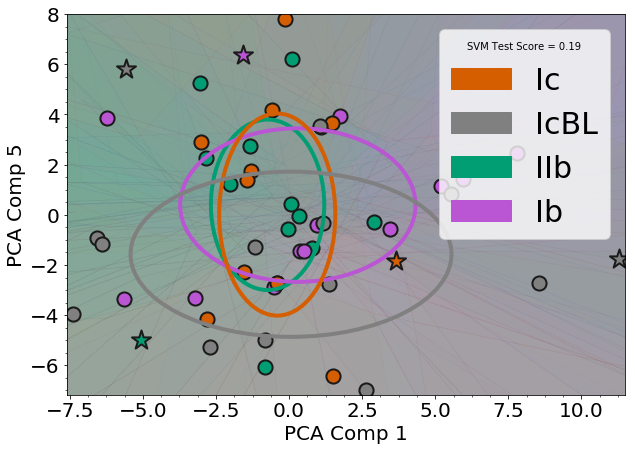

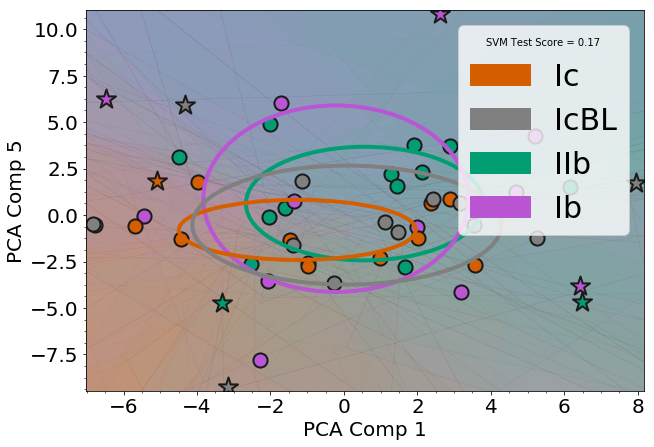

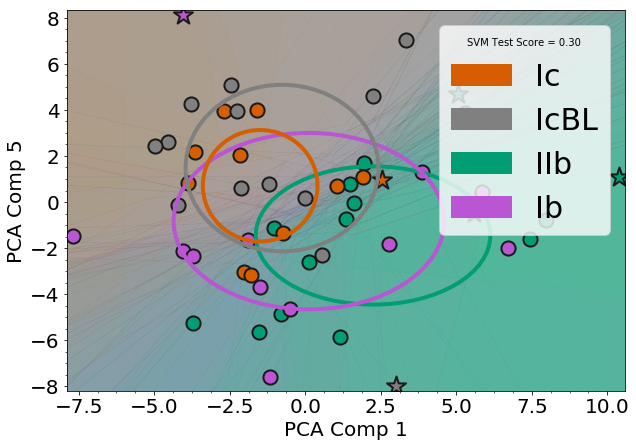

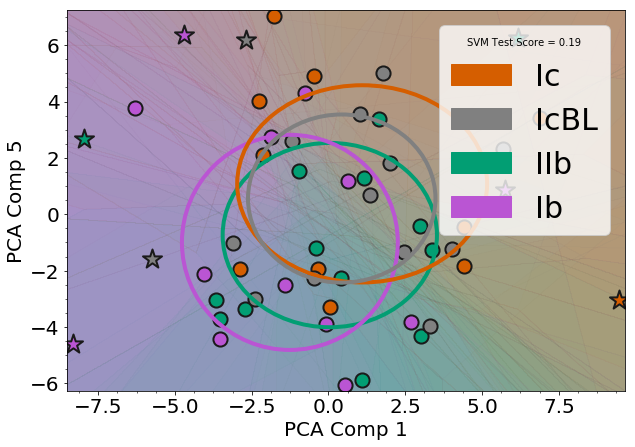

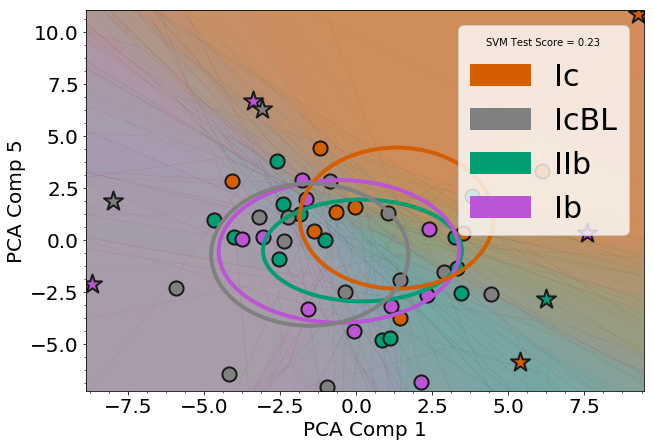

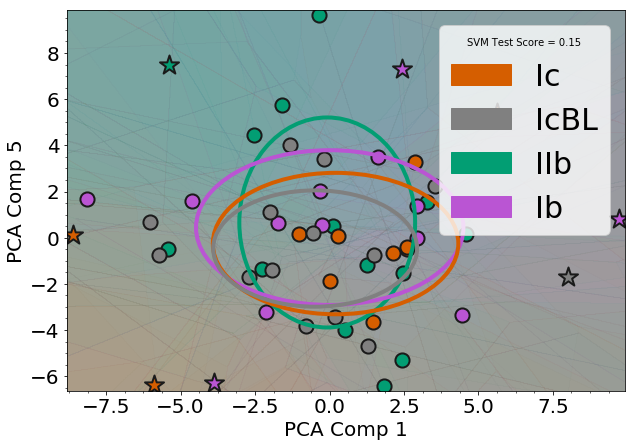

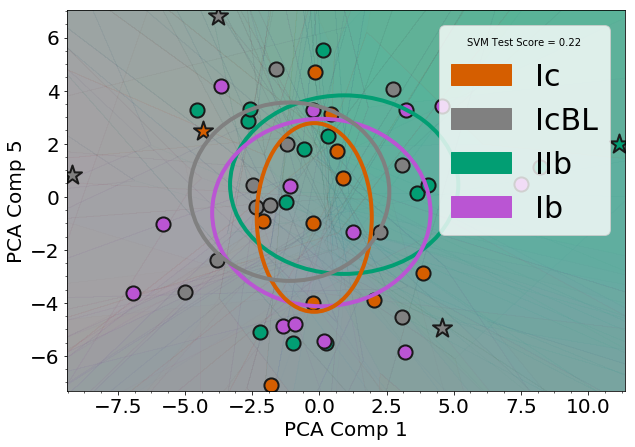

In [4]:
for i in range(10):
    snidPCA = run_PCA_fullres(5, dphase=5)
    exclude = ['sn2007uy', 'sn2009er', 'sn2005ek']
    f_all,svmsc, av5, std5, av5_train, std5_train=snidPCA.pcaPlot(1,5,(10,7),alphamean=.5,alphaell=.1,alphasvm=10,
                                              purity=True,excludeSNe=exclude, std_rad=1.0, svm=True,
                                              count=3, fig=None, ax=None,ncv=50, markOutliers=True)
    print(av5, std5)

### Phase 10

0.2929411764705882 0.08523527381967037
0.22352941176470587 0.09337945803757378
0.24705882352941178 0.10846522890932808
0.2411764705882353 0.07370567109495099
0.1811764705882353 0.07425757100263294
0.2823529411764706 0.08959733065722245
0.24705882352941178 0.09337945803757379
0.31058823529411766 0.10785098010697261
0.3317647058823529 0.10440803638745312
0.24941176470588233 0.08113383364501961


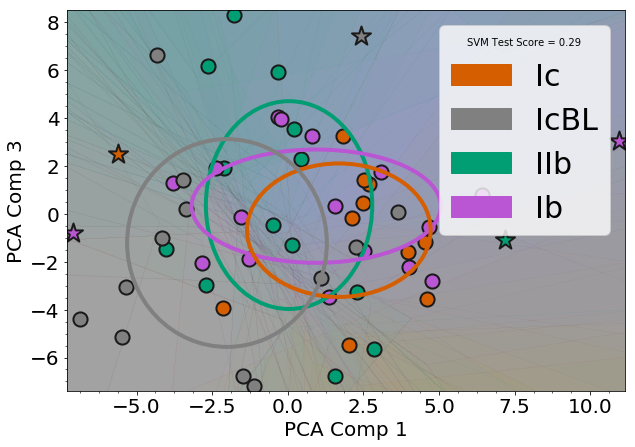

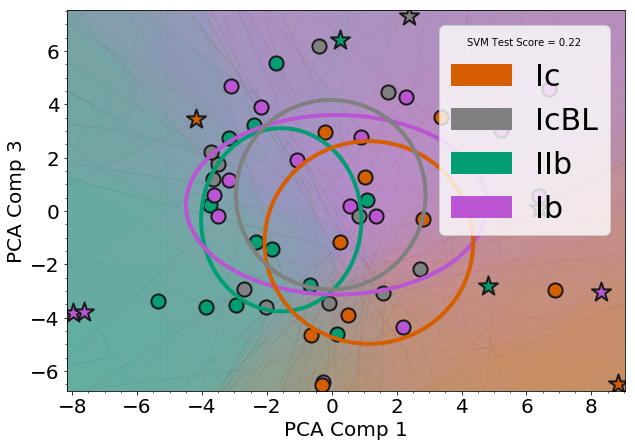

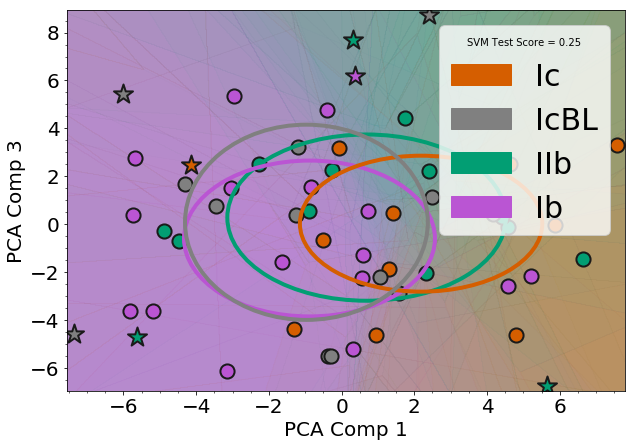

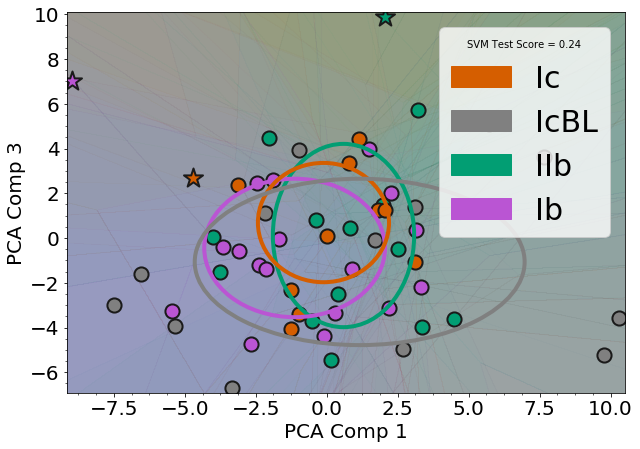

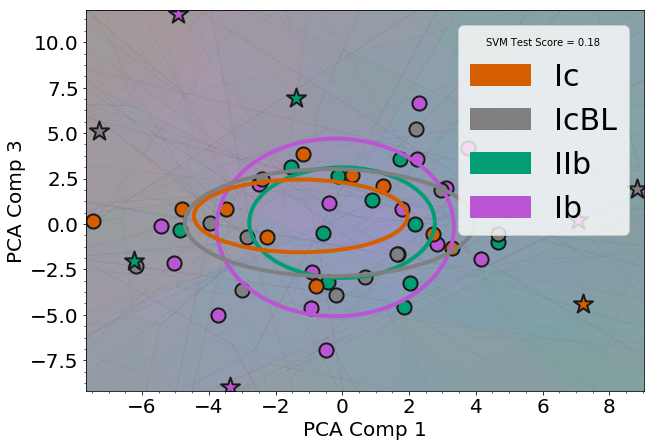

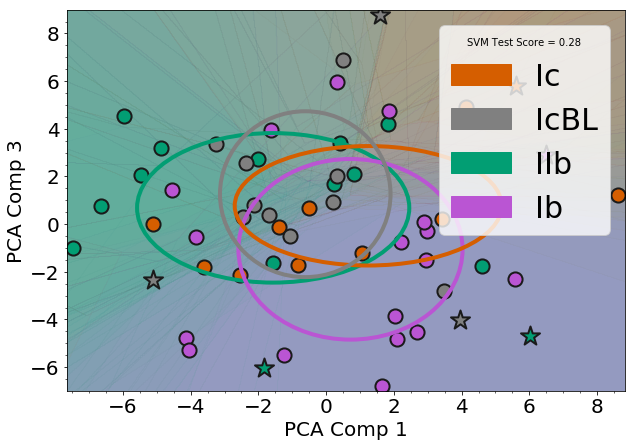

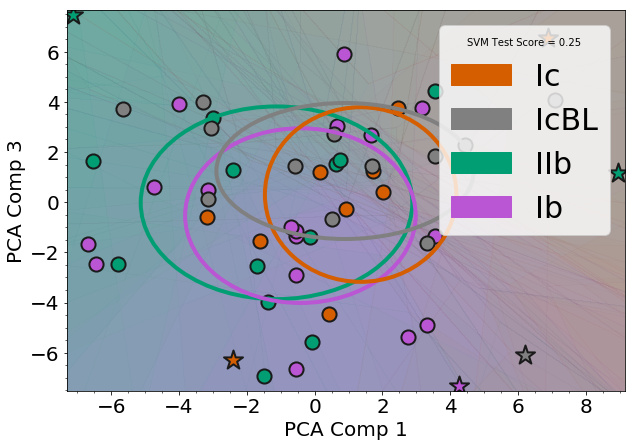

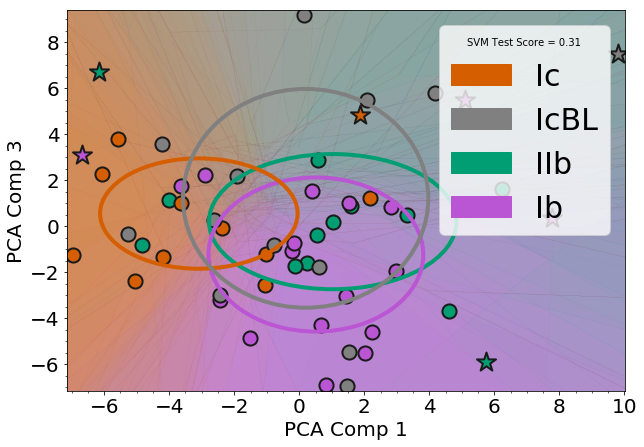

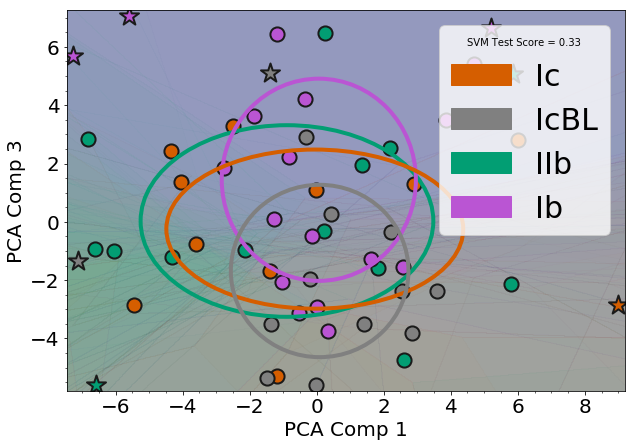

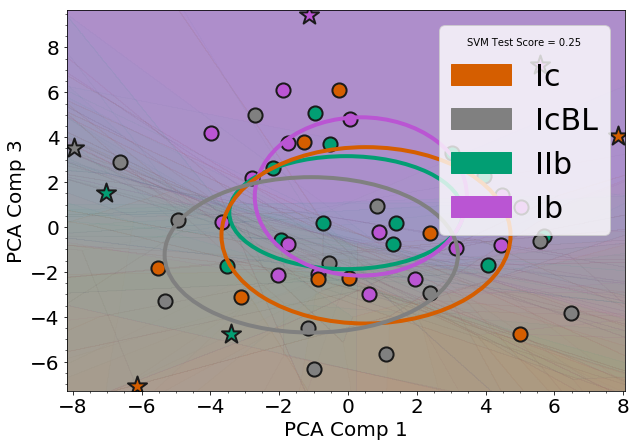

In [7]:
for i in range(10):
    snidPCA = run_PCA_fullres(10, dphase=5)
    exclude = ['sn2007uy', 'sn2009er', 'sn2005ek']
    f_all,svmsc, av10, std10, av10_train, std10_train=snidPCA.pcaPlot(1,3,(10,7),alphamean=.5,alphaell=.1,alphasvm=10,
                                              purity=True,excludeSNe=exclude, std_rad=1.0, svm=True,
                                              count=3, fig=None, ax=None,ncv=50, markOutliers=True)
    print(av10, std10)

### Phase 15

0.29411764705882354 0.0848365005991527
0.16941176470588235 0.07947927413672724
0.26 0.08810971455695427
0.23176470588235298 0.08517029551876831
0.19764705882352943 0.09245591860888706
0.24235294117647058 0.08775555858339538
0.19647058823529412 0.08031943147622723
0.1776470588235294 0.06601876633693271
0.24 0.08551897339005293
0.18823529411764703 0.08803899733585746


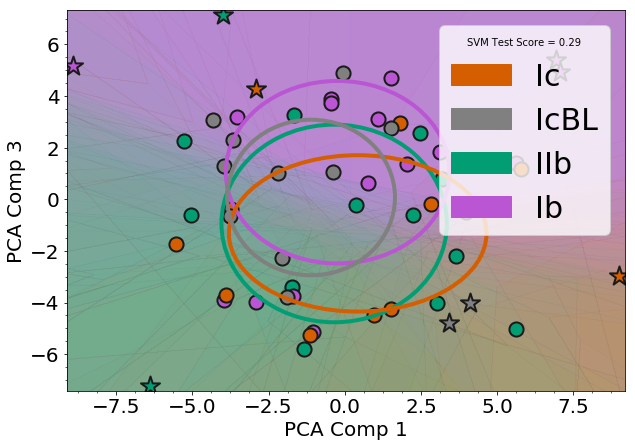

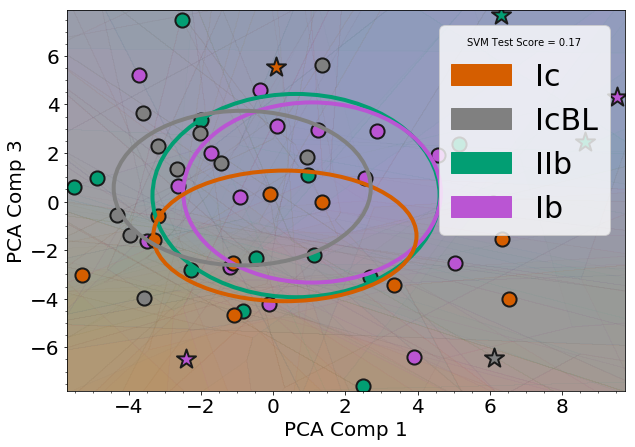

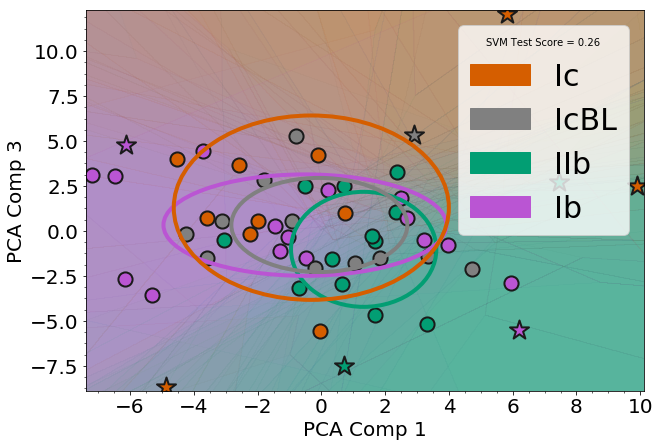

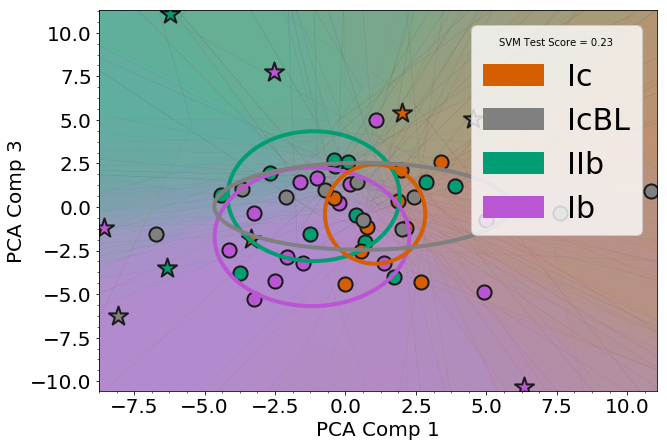

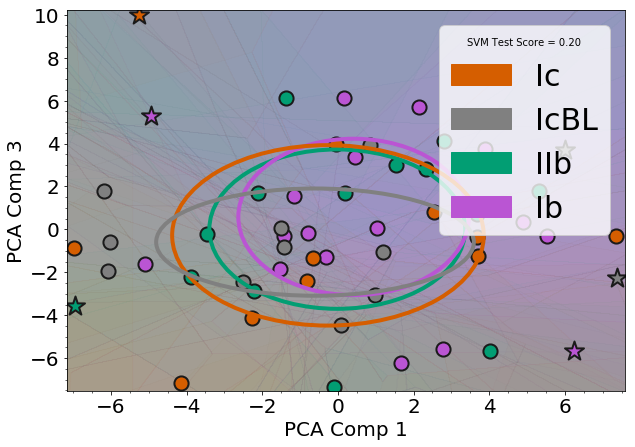

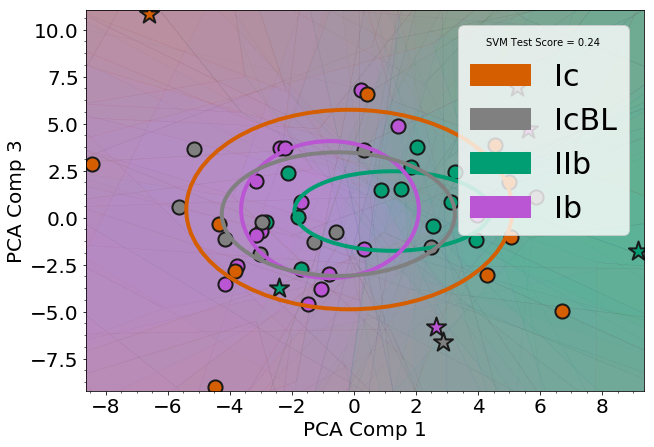

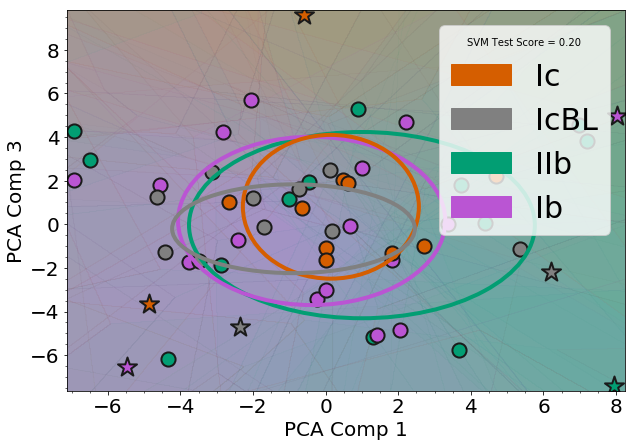

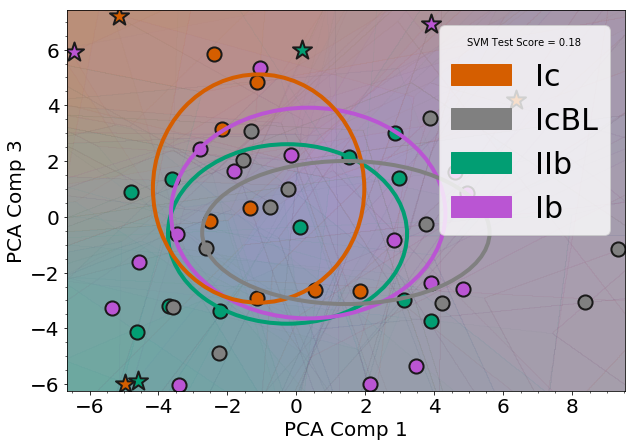

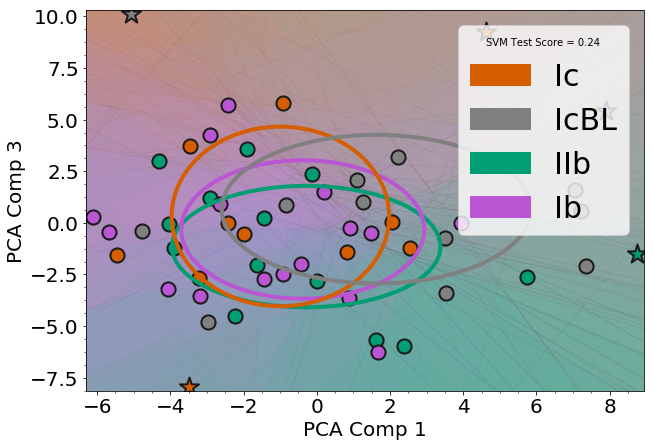

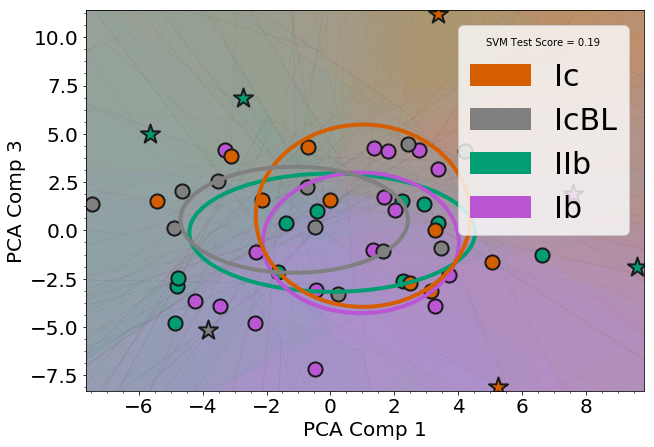

In [13]:
for i in range(10):
    snidPCA = run_PCA_fullres(15, dphase=5)
    exclude = ['sn2007uy', 'sn2009er', 'sn2005ek']
    f_all,svmsc, av15, std15, av15_train, std15_train=snidPCA.pcaPlot(1,3,(10,7),alphamean=.5,alphaell=.1,alphasvm=10,
                                              purity=True,excludeSNe=exclude, std_rad=1.0, svm=True,
                                              count=3, fig=None, ax=None,ncv=50, markOutliers=True)
    print(av15, std15)